“How do age groups differ in heart disease risk, and how do these risks patterns compare with age-specific coffee consumption patterns?”


For this question, descriptive modeling was used to communicate trends in the data. In other words "Descriptive Analysis/ Exploratory Data Analysis (EDA)."

In [ ]:
#uploading files
from google.colab import files
uploaded = files.upload()

Saving Heart_R8_Cleaned.csv to Heart_R8_Cleaned.csv
Saving Coffee_Conspt_Cleaned.csv to Coffee_Conspt_Cleaned.csv


In [ ]:
import pandas as pd

In [ ]:
#renaming the files
heart= pd.read_csv('Heart_R8_Cleaned.csv')
coffee= pd.read_csv('Coffee_Conspt_Cleaned.csv')

In [ ]:
#information on the dataset
heart.head()
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        918 non-null    int64  
 1   Age               918 non-null    int64  
 2   Sex               918 non-null    object 
 3   ChestPainType     918 non-null    object 
 4   RestingBP         918 non-null    int64  
 5   Cholesterol       918 non-null    int64  
 6   FastingBS         918 non-null    object 
 7   RestingECG        918 non-null    object 
 8   MaxHR             918 non-null    int64  
 9   ExerciseAngina    918 non-null    object 
 10  Oldpeak           918 non-null    float64
 11  ST_Slope          918 non-null    object 
 12  HeartDisease      918 non-null    object 
 13  AgeGroup          918 non-null    object 
 14  HeartDisease_num  918 non-null    int64  
 15  z_Age             918 non-null    float64
 16  z_RestingBP       918 non-null    float64
 1

In [ ]:
#information on the dataset
coffee.head()
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Occupation               10000 non-null  object 
 13  Smoking                  10000 non-null  int64  
 14  Alcohol_Consumption    

In [ ]:
#combining heart disease risk per age group into "bins"
heart_risk = (
    heart.groupby('AgeGroup')['HeartDisease_num']
         .mean()
         .reset_index()
         .rename(columns={'HeartDisease_num': 'heart_disease_risk'}))

#convert the mean into %
heart_risk['heart_disease_risk']*= 100
heart_risk

#------------------------------------------------------------------

#converting coffee intake per age group
coffee_intake = (
    coffee.groupby('AgeGroup')['Coffee_Intake']
         .mean()
         .reset_index()
         .rename(columns={'CoffeeIntake': 'coffee_intake'}))
coffee_intake

,AgeGroup,Coffee_Intake
0,18–34,2.505351
1,35–49,2.520473
2,50–64,2.490726
3,65+,2.414706


In [ ]:
#merge the two data sets within the same age group bins
df_agg = pd.merge(heart_risk, coffee_intake, on='AgeGroup', how='inner')
df_agg


,AgeGroup,heart_disease_risk,Coffee_Intake
0,18–34,28.571429,2.505351
1,35–49,38.888889,2.520473
2,50–64,62.022901,2.490726
3,65+,69.902913,2.414706


In [ ]:
#ensuring the age groups are ordered correctly for the visual

df_agg['AgeGroup'] = pd.Categorical(df_agg['AgeGroup'],
                                    categories=['18–34','35–49','50–64','65+'],
                                    ordered=True)

df_agg = df_agg.sort_values('AgeGroup')


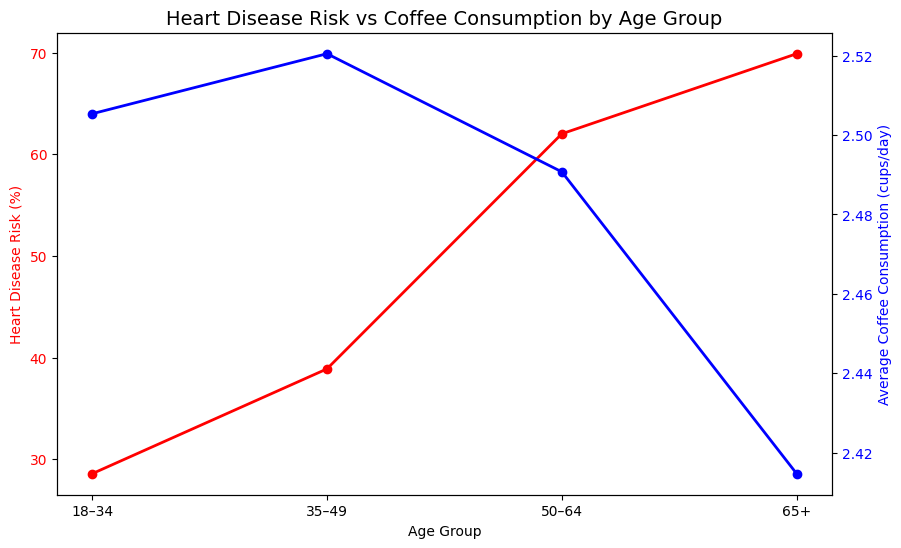

In [ ]:
#Modelling

import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(10,6))

#Heart Disease Risk (%)
#LINE 1 IN RED
ax1.plot(df_agg['AgeGroup'],
         df_agg['heart_disease_risk'],
         color='red',
         marker='o',
         linewidth=2,
         label='Heart Disease Risk (%)')

ax1.set_xlabel('Age Group')
ax1.set_ylabel('Heart Disease Risk (%)', color='red')
ax1.tick_params(axis='y', labelcolor='red')


#Coffee Intake
#LINE 2 IN BLUE
ax2 = ax1.twinx() #created y-axis on the right side of the plot

ax2.plot(df_agg['AgeGroup'],
         df_agg['Coffee_Intake'],
         color='blue',
         marker='o',
         linewidth=2,
         label='Avg Coffee (cups/day)')

ax2.set_ylabel('Average Coffee Consumption (cups/day)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')


plt.title('Heart Disease Risk vs Coffee Consumption by Age Group', fontsize=14)
plt.grid(False)
plt.show()
